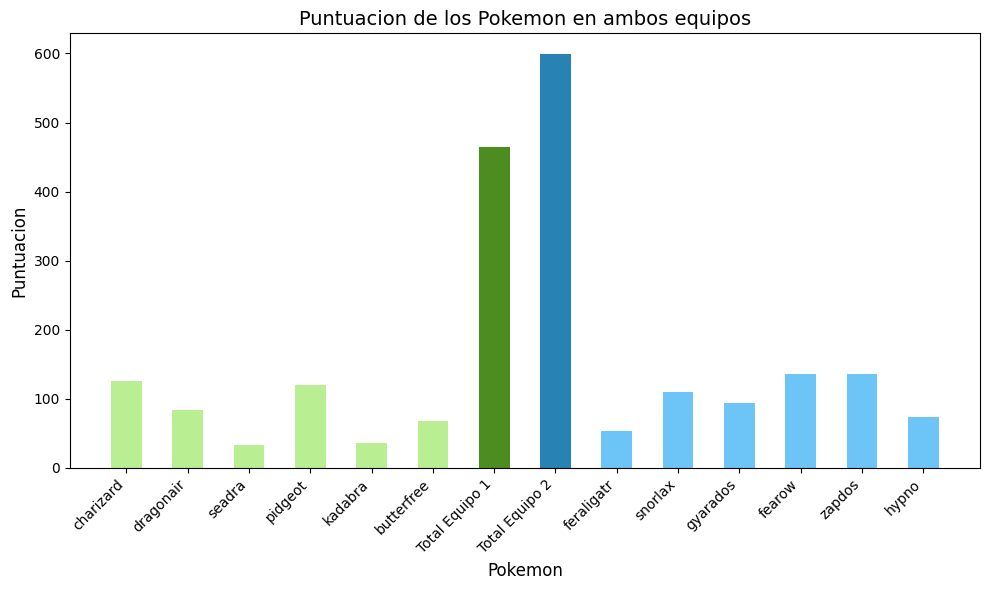

465.0

In [1]:
#PRÁCTICA MINERÍA DE TEXTOS
#ELENA MAÑUECO CUBILLO. CURSO: 2024/2025

import requests

#Los equipor que vamso a comparar
equipo_1=["charizard", "dragonair", "seadra", "pidgeot", "kadabra", "butterfree"]
equipo_2=["feraligatr", "snorlax", "gyarados", "fearow", "zapdos", "hypno"]

#Las ventajas y desventajas que vamos a utilizar para calcular el multiplicador
ventajas = ["fire", "flying", "poison", "ice", "bug"]
desventajas = ["water", "rock", "ground"]

#Obtenemos los datos de la API
def datos_pokemon(nombre):
  url = f"https://pokeapi.co/api/v2/pokemon/{nombre}"
  response = requests.get(url)

  if response.status_code==200:
    return response.json()
  else:
    print(f"No se pudo obtener información de {nombre}")
    return None

#Sacamos los multiplicadores en base a las ventajas(*1.5) y las desventajas(*0.5), si tiene dos tipos de ataque se hace una media
def multiplicador(pokemon):
  datos = datos_pokemon(pokemon)
  if datos:
    poder=[tipo['type']['name'] for tipo in datos['types']]
    if len(poder)==2:
      if poder[0]==poder[1]:
        if poder[0] in ventajas:
          return 1.5
        elif poder[0] in desventajas:
          return 0.5
        else:
          return 1
      elif poder[0] != poder[1]:
        if poder[0] in ventajas:
          if poder[1] in desventajas:
            return 1.5*0.5
          else:
            return 1.5
        elif poder[0] in desventajas:
          if poder[1] in ventajas:
            return 0.5*1.5
          else:
            return 0.5
        elif poder[0] not in ventajas and poder[0] not in desventajas:
          if poder[1] in ventajas:
            return 1.5
          elif poder[1] in desventajas:
            return 0.5
          else:
            return 1
    else:
      if poder[0] in ventajas:
        return 1.5
      elif poder[0] in desventajas:
        return 0.5
      else:
        return 1

#Se calcula la puntuacion individual del ataque multiplicandola por el multiplicador
def puntuacion_individual(pokemon):
  datos= datos_pokemon(pokemon)
  if datos:
    puntuacion_individual=0
    for stat in datos["stats"]:
      if stat["stat"]["name"] == "attack":
        puntuacion_individual = stat["base_stat"]
        mult = multiplicador(pokemon)
  return puntuacion_individual*mult

#Se suma en el equipo
def puntuacion_equipo(equipo):
  puntuacion = 0
  for pokemon in equipo:
   puntuacion+= puntuacion_individual(pokemon)
  return puntuacion

#Y se hace un gráfico de barras comparando ambos equipos
def grafico_equipos(equipo_1, equipo_2):
  import matplotlib.pyplot as plt
  import numpy as np

  punt_eq1= puntuacion_equipo(equipo_1)
  punt_eq2= puntuacion_equipo(equipo_2)


  equipos_combinados= equipo_1 + ['Total Equipo 1'] + ['Total Equipo 2'] + equipo_2
  puntuaciones=[puntuacion_individual(pokemon) for pokemon in equipo_1]+[punt_eq1]+[punt_eq2]+[puntuacion_individual(pokemon) for pokemon in equipo_2]

  co=np.arange(len(equipos_combinados))
  colores=['#b9ee93']*len(equipo_1)+['#4d8c20']+['#2982b4']+['#6dc4f6']*len(equipo_2)
  an=0.5
  fig,ax= plt.subplots(figsize=(10,6))
  ax.bar(co, puntuaciones, an, color=colores)


  ax.set_xlabel('Pokemon', fontsize=12)
  ax.set_ylabel('Puntuacion', fontsize=12)
  ax.set_title('Puntuacion de los Pokemon en ambos equipos', fontsize=14)
  ax.set_xticks(co)
  ax.set_xticklabels(equipos_combinados, rotation=45, ha='right', fontsize=10)

  plt.tight_layout()
  plt.show()



grafico_equipos(equipo_1, equipo_2)


